In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('results.csv')
df.head()

,N,f,timeToElection,alpha,timeSpentInNanoSeconds
0,3,1,500,0.0,2494549
1,3,1,500,0.0,964128
2,3,1,500,0.0,1791525
3,3,1,500,0.0,673687
4,3,1,500,0.0,1661249


In [115]:
df_mean = df.pivot_table(index='N', columns='timeToElection', values='timeSpentInNanoSeconds', aggfunc='mean')
df_mean.head()

timeToElection,500,1000,1500,2000
N,,,,
3,7.951995e+05,3.780719e+05,4.405627e+05,3.753755e+05
10,1.328930e+06,4.355623e+05,1.272607e+06,9.226655e+05
40,3.466012e+08,2.833749e+08,4.329215e+08,2.919420e+08
70,4.170129e+08,7.255082e+08,1.142918e+09,1.622369e+09
100,4.667288e+08,9.284209e+08,1.418173e+09,1.745999e+09


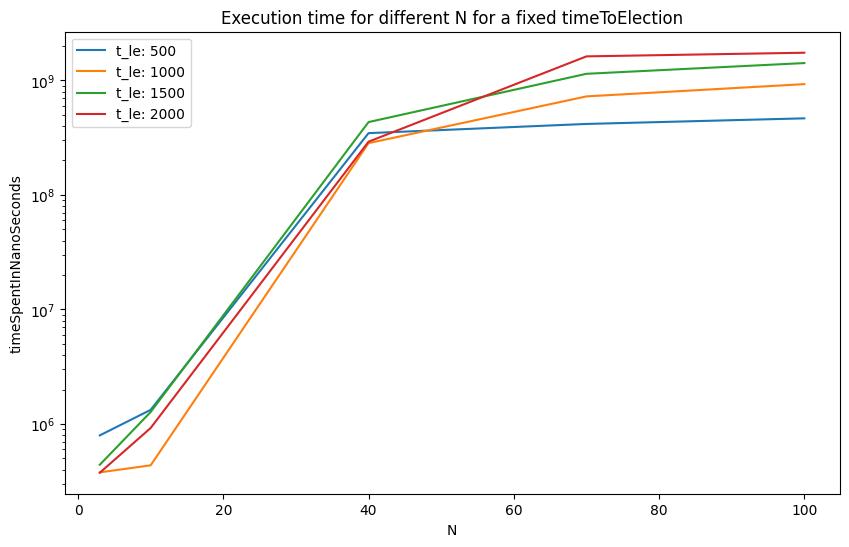

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(df_mean)
plt.xlabel('N')
plt.ylabel('timeSpentInNanoSeconds')
legend = ['t_le: ' + str(col) for col in df_mean.columns]
plt.legend(legend)
plt.title('Execution time for different N for a fixed timeToElection')

plt.yscale('log')  # Change the y-axis to a logarithmic scale
# plt.xscale('log')  # Change the x-axis to a logarithmic scale

plt.show()

In [117]:
df_mean = df.pivot_table(index='timeToElection', columns='N', values='timeSpentInNanoSeconds', aggfunc='mean')
df_mean.head()

N,3,10,40,70,100
timeToElection,,,,,
500,795199.466667,1.328930e+06,3.466012e+08,4.170129e+08,4.667288e+08
1000,378071.866667,4.355623e+05,2.833749e+08,7.255082e+08,9.284209e+08
1500,440562.666667,1.272607e+06,4.329215e+08,1.142918e+09,1.418173e+09
2000,375375.533333,9.226655e+05,2.919420e+08,1.622369e+09,1.745999e+09


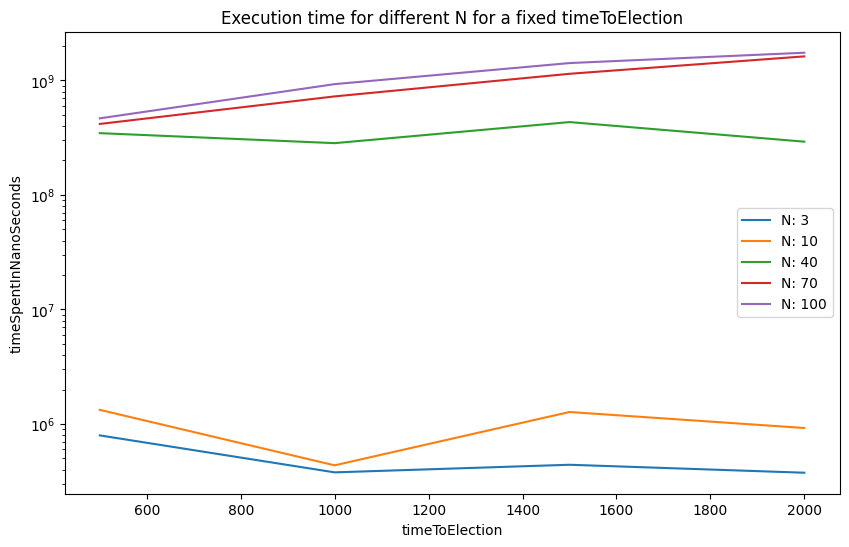

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(df_mean)
plt.xlabel('timeToElection')
plt.ylabel('timeSpentInNanoSeconds')
legend = ['N: ' + str(col) for col in df_mean.columns]
plt.legend(legend)
plt.title('Execution time for different N for a fixed timeToElection')

plt.yscale('log')  # Change the y-axis to a logarithmic scale
# plt.xscale('log')  # Change the x-axis to a logarithmic scale

plt.show()

In [119]:
df_mean = df.groupby(['N', 'timeToElection', 'alpha']).mean().reset_index()
df_mean.drop(columns='f', inplace=True)
df_mean.head()


,N,timeToElection,alpha,timeSpentInNanoSeconds
0,3,500,0.0,1517027.6
1,3,500,0.1,383064.6
2,3,500,1.0,485506.2
3,3,1000,0.0,590368.4
4,3,1000,0.1,302144.8


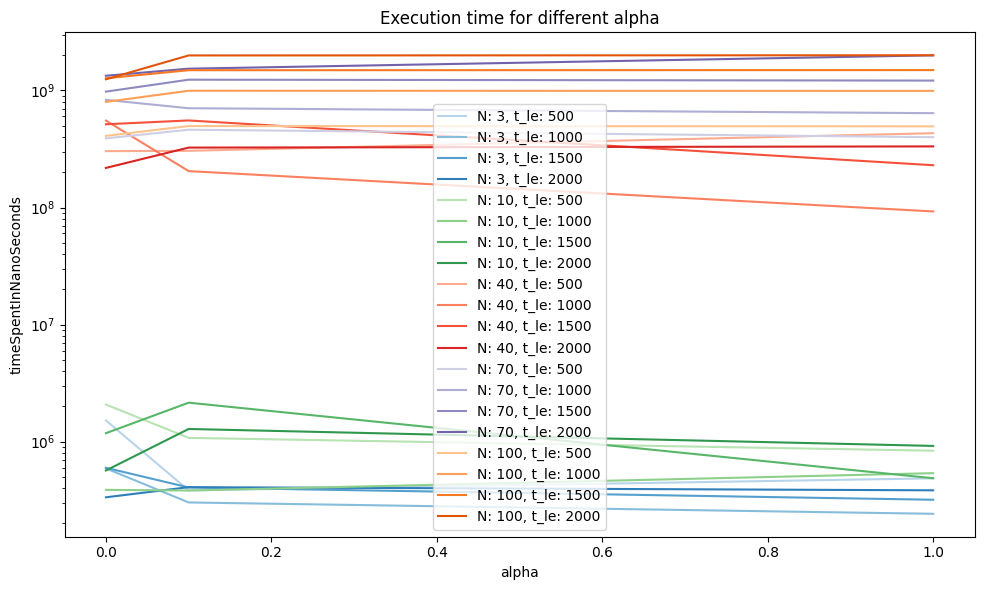

In [120]:
plt.figure(figsize=(10, 6))
colors_group1 = plt.cm.Blues(np.linspace(0.3, 0.7, 4))
colors_group2 = plt.cm.Greens(np.linspace(0.3, 0.7, 4))
colors_group3 = plt.cm.Reds(np.linspace(0.3, 0.7, 4))
colors_group4 = plt.cm.Purples(np.linspace(0.3, 0.7, 4))
colors_group5 = plt.cm.Oranges(np.linspace(0.3, 0.7, 4))
colors_group_dict = {
    3: colors_group1, 
    10: colors_group2, 
    40: colors_group3,
    70: colors_group4,
    100: colors_group5,
}

for N in df_mean['N'].unique():
    i = 0
    color_group = colors_group_dict[N]
    for timeToElection in df_mean['timeToElection'].unique():
        df_temp = df_mean[(df_mean['N'] == N) & (df_mean['timeToElection'] == timeToElection)]
        plt.plot(df_temp['alpha'], df_temp['timeSpentInNanoSeconds'], label='N: ' + str(N) + ', t_le: ' + str(timeToElection), color=color_group[i])
        i += 1
plt.xlabel('alpha')
plt.ylabel('timeSpentInNanoSeconds')
plt.title('Execution time for different alpha')
plt.legend()
plt.tight_layout()

plt.yscale('log')  # Change the y-axis to a logarithmic scale

plt.show()
